# Activity 3 - Mass of a SMBH with Reverberation Mapping

In this activity, we will measure the mass of an AGN using reverberation mapping!

\

I altered the data a little to better fit this activity, but it is all based on real data sets for NGC 5548 (a Seyfert AGN). The photometry is from [Faurlough et al. 2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...821...56F/abstract) and the spectrum is from [the STScI AGN atlas](https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/the-agn-atlas).

\

**Step 0:** To start, run the following cell to import the packages we'll use:

In [ ]:
# always start by importing useful packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import random
%matplotlib inline



---



## Part 1 - Photometry

In order to measure the black hole mass, we first need the size of the Broad Line Region (BLR). We can use the time delay between light emitted by the accretion disk (UV light) and by the BLR (optical light) to find this size.

Upload the "photometry.csv" file to Colab so we can use it. This file contains the flux measurements in the UV and optical over time:
- "time" = time of observation in days
- "UV flux" = normalized flux in UV wavelengths
- "Optical flux" = normalized flux in optical wavelengths


### Step 1 - Read in data

- Read in this data file (using *ascii.read()* or whatever package you like)
- Pull out the time and flux columns into their own Numpy arrays.

In [ ]:
# read in the data file
data = ascii.read('photometry.csv')
time = data["time"]
flux_uv = data["UV flux"]
flux_opt = data["Optical flux"]
print(data)

# pull out each column into it's own array
time = np.array(time)
flux_uv = np.array(flux_uv)
flux_opt = np.array(flux_opt)


   time         UV flux          Optical flux   
---------- ------------------ ------------------
 56684.779 0.9940856909130492  0.986796492782801
56685.7848 0.9782649292801566 0.9897094018434606
  56686.77 0.9851583330140612 0.9965061896516665
56687.8837 0.9976870974426773 0.9854371352211597
56689.8415 0.9856520836772344 0.9702802984088608
56692.9497 0.9952066338259694 0.9795142201311517
56693.7886 0.9904814330848989 0.9692025220564167
56694.7692 1.0076949245791595 0.9722319474795027
56695.7086  1.008249799638485  0.981456159504925
 56696.727 1.0076642188079306 0.9841748746282072
       ...                ...                ...
56880.3747 1.0536218711184513  1.040879504342382
56883.3793 0.9881190803410141 1.0569005041760098
 56884.372 0.9911310606256657 1.0572888920507644
56885.3712 1.0044217152170078 1.0584540556750284
56886.3697  0.975055173731305 1.0558324375204347
56887.3693 0.9766918644067117  1.048161776994031
56891.3663 0.9825272457238327 1.0666102010448753
56892.3666 0.9713545

### Step 2 - Plot light curve

- Make a plot of the flux vs. time for both data sets on the same graph
- Choose different colors/markers/linestyles for each dataset
- Add axis labels to your graph
- Add a legend to your graph

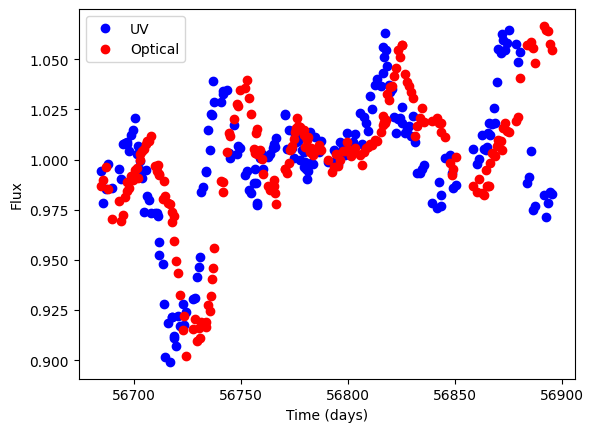

In [ ]:
plt.plot(time, flux_uv, 'bo', label='UV')
plt.plot(time, flux_opt, 'ro', label='Optical')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.legend()
plt.show()

### Step 3 - Measure time delay

When we plot the light curve, we see that the different data sets have the same shape but are offset slightly in time. This is due to the extra time it takes the BLR to absorb & re-emit the light, and will tell us the radius of the BLR.

To measure the time delay ($\Delta t$) between the UV light variation and the optical light variations, we're just going to use our eyes:
- The variable "delta_t" represents our delay value. Pick any value to try!
- Replot both light curves, but give the UV data set your chosen time delay.  
- Test different delay values to see which creates the best match

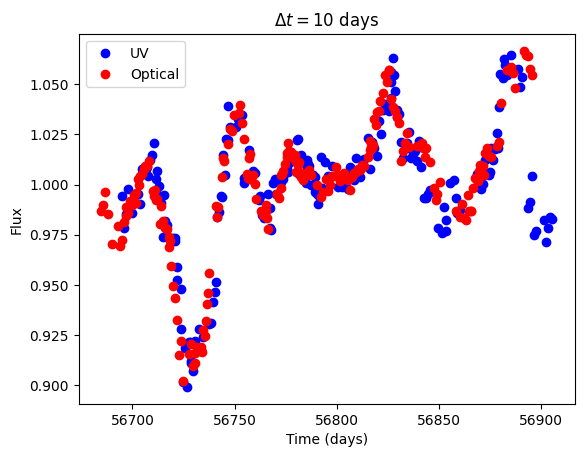

In [ ]:
# measure the offset by eye
delta_t = 10   # days

# replot light curves
# shift the UV data in time based on your chosen value
plt.plot(time + delta_t, flux_uv, 'bo', label='UV')
plt.plot(time, flux_opt, 'ro', label='Optical')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.title('$\Delta t = $'+str(delta_t)+' days')
plt.legend()
plt.show()


### Step 4 - Calculate BLR radius

Use your best-fit time delay (converted to seconds!) and the speed of light to calculate the size of the BLR (in cm).  Hint: $c = 3\times10^{10}$ cm/s.

In [ ]:
# BLR radius
c = 3e10                # cm/s
radius = c * delta_t * 24 * 3600   # cm
print(radius, ' cm')
print(radius / 1.496e+13, ' AU')

2.592e+16  cm
1732.6203208556149  AU


Print out the radius in both cm and AU. Hint: $1~AU = 1.496\times10^{13}~cm$.

You should get a BLR radius of about 2000 AU.


---



## Part 2 - Spectroscopy

The last thing we need is the speed of the BLR clouds, which requires a spectum from the BLR.

### Step 5 - Read in data

Upload & read in the file "spectrum.csv", which has columns:
- "wavelength" = wavelength in Angstroms
- "flux" = normalized flux

Then pull out each column and save them as new numpy arrays.

In [ ]:
# read in the spectrum
data2 = ascii.read("spectrum.csv")
print(data2)

# pull out each column
wave = data2["wavelength"]
flux = data2["flux"]

# save each column as a numpy array
wave = np.array(wave)
flux = np.array(flux)

wavelength         flux        
---------- --------------------
    4002.0  0.09313676137809304
    4004.0  0.09173265262674496
    4006.0  0.08713279483111573
    4008.0   0.0773689065052859
    4010.0   0.0750922546643522
    4012.0   0.0755842184070786
    4014.0  0.07960764116148825
    4016.0  0.08175011137906443
    4018.0  0.08814783658682895
    4020.0  0.08913888687301307
       ...                  ...
    6978.0  0.05265924967009597
    6980.0 0.040712094965615106
    6982.0  0.03884480157210022
    6984.0  0.04158146051834753
    6986.0  0.03959296222077155
    6988.0  0.03942099136718684
    6990.0  0.04545849265712818
    6992.0 0.049030758492761624
    6994.0  0.05463636001680213
    6996.0  0.06288087390879066
    6998.0   0.0587183859341149
Length = 1499 rows


### Step 6 - Plot spectrum

Plot the AGN spectrum, including axis labels.

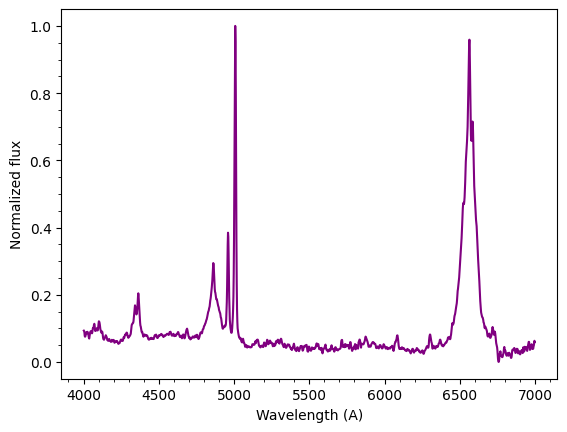

In [ ]:
plt.plot(wave, flux, color='purple')
plt.xlabel('Wavelength (A)')
plt.ylabel('Normalized flux')
plt.minorticks_on()
plt.show()

### Step 7 - Measure line width

In your plot, you should see several strong emission lines! They "broad lines" have wider shapes, and correspond to $H\gamma$ 4340 A, $H\beta$ 4861A, and $H\alpha$ 6563 A. The "narrow lines" are the two thin lines around 5000 A, which correspond to [O III] 4959A and 5007A.

To measure the BLR speed:

1. We want to measure the speed of the BROAD line region, so choose one of the broad H lines to study.

2. Replot the spectrum in the cell below, but zoom in on your chosen emission line by changing the x and y axis limits. Plot the minor tick marks on the x-axis using:
```
plt.minorticks_on()
```




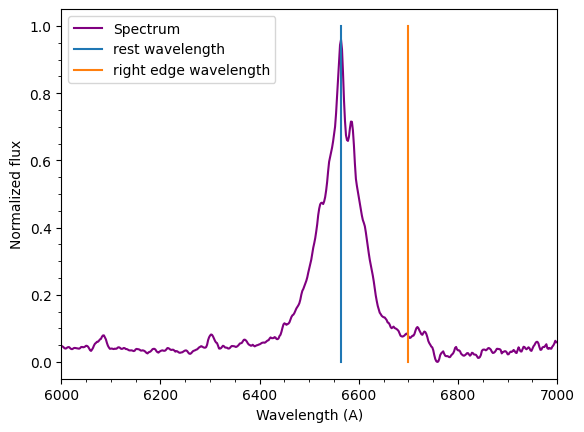

In [ ]:
plt.plot(wave, flux, color='purple', label='Spectrum')
plt.xlabel('Wavelength (A)')
plt.ylabel('Normalized flux')
plt.minorticks_on()
plt.xlim(6000, 7000)
plt.plot([6563, 6563], [0,1], label='rest wavelength')
plt.plot([6700, 6700], [0,1], label='right edge wavelength')
plt.legend()
plt.show()

3. Estimate the wavelength value for the right edge of the emission line, corresponding to where the emission line meets the baseline (continuum) of the spectrum. Write this value in the "lambda_right" variable below.





In [ ]:
# right edge of emission line
lambda_right =  6700     # Angstroms

5. Calculate the radial velocity of the cloud using the Doppler shift between the rest wavelength of the line and the right side wavelength.

Print out the speed in both cm/s and km/s.

In [ ]:
# v = dl/l * c
v = (lambda_right - 6563) / 6563 * c
print(v, 'cm/s')
print(v/1e5, 'km/s')

626238000.9142162 cm/s
6262.380009142162 km/s


You should get a speed of few thousand km/s.



---



## Part 3 - Black hole mass

Now we're ready to calculate the mass of the black hole! Use the reverberation mapping equation: $$M = \frac{6~ V^2 ~ R}{G}$$
where $G = 6.67\times10^{-8} ~cm^3/g/s^2$. Be careful with units!

Then convert the blach hole mass to solar masses. Hint: $1 M_\odot = 2\times10^{33} g$.


In [ ]:
# SMBH mass
G = 6.67e-8
M = 6 * v**2 * radius / G   # g
print(M, ' g')

# convert to solar masses
M = M / 2e33    # Msun
print(M / 1e6, ' million Msun')


# shoudl be 5x10^7 Msun

9.144063828316423e+41  g
457.2031914158212  million Msun


**Question**: The mass of Sgr A* is about 4 million M$_\odot$. Is this AGN more or less massive than Sgr A* ?

\

**Answer**: About 100x more massive!




---

## Final instructions
Finish any remaining exercises, then **send me your notebook** to get participation credit. You can download your notebook as an ".ipynb" file and email it, or share the notebook with me through google drive. Remember to answer any questions!

\
If you're finishing the activity at home and run into python problems, don't worry about getting the code exactly right. This isn't a coding class and I'm not grading you on how well you know python. If you're stuck, add a text box and explain what you're trying to do *in words*. Then I'll know you have the right idea and know how to apply the content, even if the python code itself is not working. You're also welcome to stop by my office to ask coding questions anytime!